Import Library


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kucingku-capstone/machine-learning/main/dataset/cats_dataset_updated.csv')
df

,Unnamed: 0,cat_id,url,type,age,gender,size,coat,breed,photos,med_photos,user_id,rating
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...,11355,1.74
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...,2127,1.88
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...,14219,2.12
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...,8356,3.47
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...,8029,3.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70140,2995,50747837,https://rocha.net/app/exploreabout.jsp,Cat,Senior,Male,Large,Hairless,Sphynx,"['https://dummyimage.com/985x1001', 'https://p...","['https://dummyimage.com/61x139', 'https://pla...",7468,4.69
70141,2996,50747838,http://www.cowan.org/blog/tagfaq.htm,Cat,Baby,Female,Small,Hairless,Sphynx,"['https://dummyimage.com/746x855', 'https://pi...",[],8556,3.99
70142,2997,50747839,http://hernandez-olson.info/posts/tag/tagabout...,Cat,Young,Male,Small,Hairless,Sphynx,"['https://picsum.photos/804/428', 'https://pla...",[],8821,3.74
70143,2998,50747840,https://www.jefferson.com/tag/app/tagsregister...,Cat,Adult,Male,Medium,Hairless,Sphynx,"['https://picsum.photos/381/221', 'https://dum...","['https://picsum.photos/66/691', 'https://pics...",6816,4.00


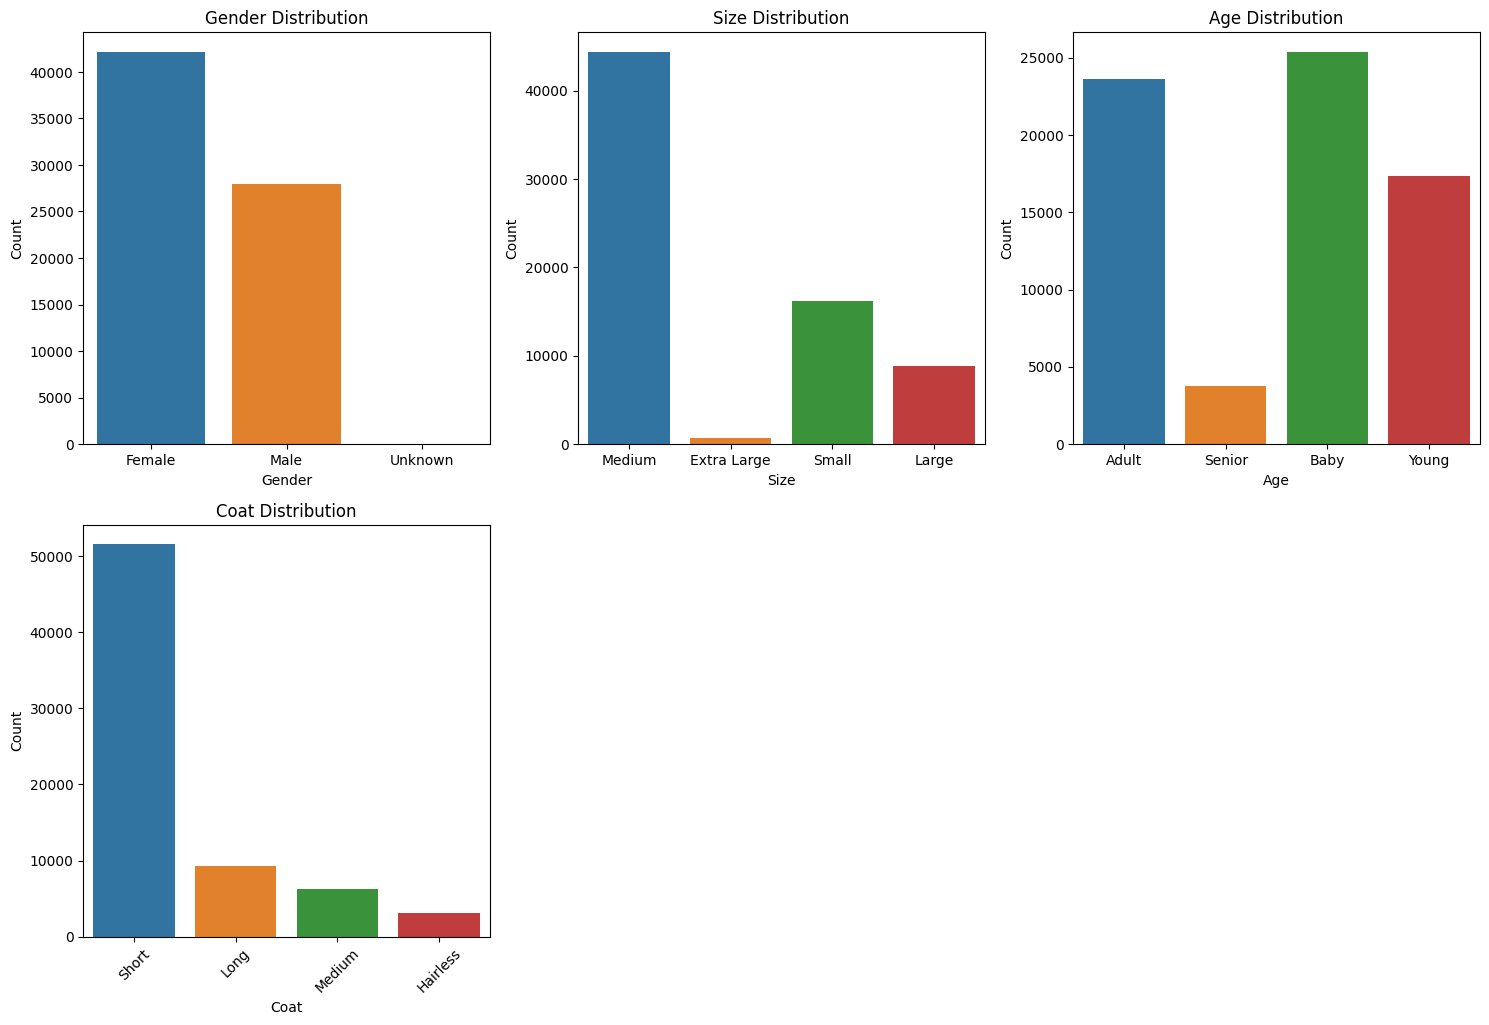

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize 4 main category in dateset
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.countplot(x='size', data=df)
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.countplot(x='age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.countplot(x='coat', data=df)
plt.title('Coat Distribution')
plt.xlabel('Coat')
plt.ylabel('Count')

plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


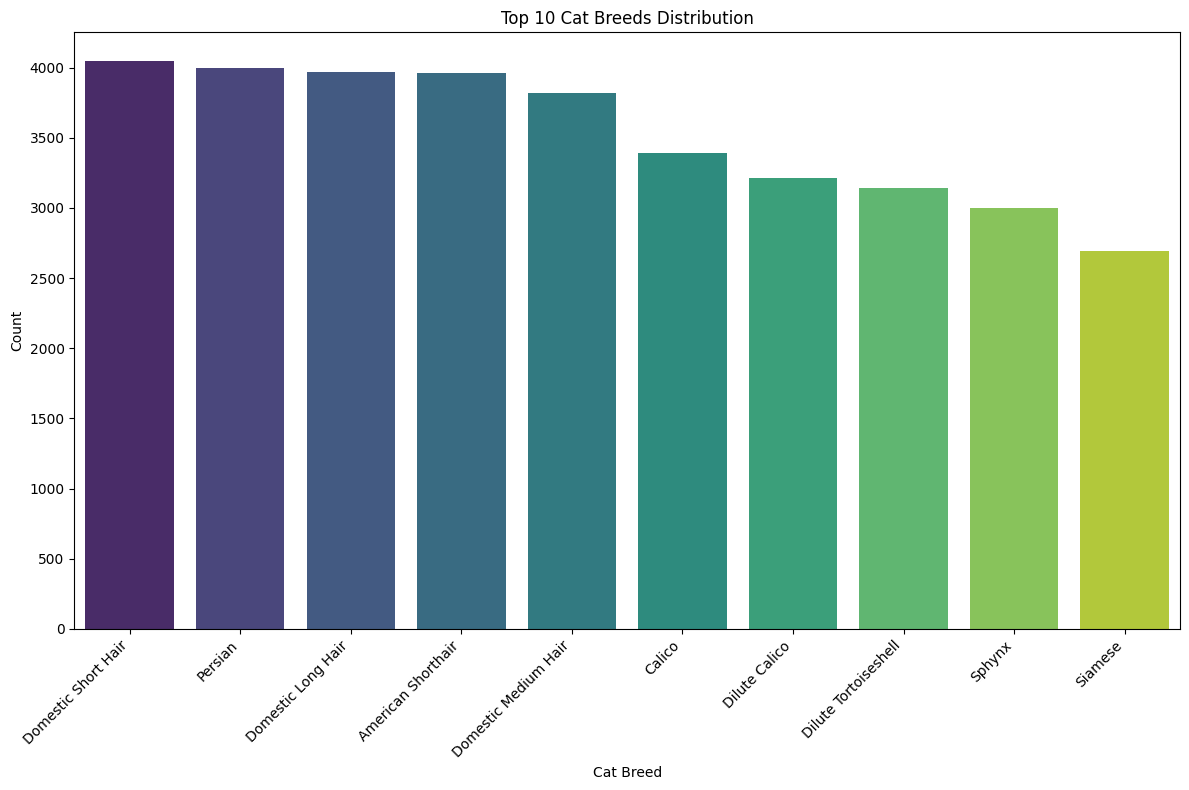

In [41]:
# Get the top N breeds for visualization (change N as needed)
top_n_breeds = 10
top_breeds = df['breed'].value_counts().nlargest(top_n_breeds).index

# Filter the dataframe for the top breeds
top_breeds_df = df[df['breed'].isin(top_breeds)]

# Visualize the distribution of the top N breeds
plt.figure(figsize=(12, 8))
sns.countplot(x='breed', data=top_breeds_df, order=top_breeds, palette='viridis')
plt.title(f'Top {top_n_breeds} Cat Breeds Distribution')
plt.xlabel('Cat Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Data preprocessing

In [ ]:
user_encoder = LabelEncoder()
cat_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
coat_encoder = LabelEncoder()
size_encoder = LabelEncoder()
age_encoder = LabelEncoder()

In [ ]:
df['user_id'] = user_encoder.fit_transform(df['user_id'].astype(str))
df['cat_id'] = cat_encoder.fit_transform(df['cat_id'].astype(str))
df['gender'] = gender_encoder.fit_transform(df['gender'].astype(str))
df['coat'] = coat_encoder.fit_transform(df['coat'].astype(str))
df['size'] = size_encoder.fit_transform(df['size'].astype(str))
df['age'] = age_encoder.fit_transform(df['age'].astype(str))


In [ ]:
# Menyimpan nama kolom yang akan dihapus dalam sebuah list
columns_to_drop = ['Unnamed: 0', 'type', 'url', 'photos', 'med_photos']

# Menghapus kolom-kolom yang ada dalam list dari DataFrame
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Menampilkan beberapa baris pertama dari DataFrame setelah penghapusan kolom
print(df_cleaned.head())

   cat_id  age  gender  size  coat       breed  user_id  rating
0   65691    0       0     2     3  Abyssinian     1508    1.74
1   61631    0       1     0     3  Abyssinian     6255    1.88
2   59042    2       0     2     3  Abyssinian     4690    2.12
3   58886    1       0     3     3  Abyssinian    13175    3.47
4   57794    3       0     2     3  Abyssinian    12812    3.34


### Split the dataset into training and testing

In [ ]:
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

### Create the collaborative filtering model using TensorFlow

In [ ]:
num_users = len(user_encoder.classes_)
num_cats = len(cat_encoder.classes_)
num_genders = len(gender_encoder.classes_)
num_coats = len(coat_encoder.classes_)
num_sizes = len(size_encoder.classes_)
num_ages = len(age_encoder.classes_)

In [ ]:
embedding_size = 50

In [ ]:
# Define input layers
user_input = Input(shape=(1,), name='user_input')
cat_input = Input(shape=(1,), name='cat_input')
gender_input = Input(shape=(1,), name='gender_input')
coat_input = Input(shape=(1,), name='coat_input')
size_input = Input(shape=(1,), name='size_input')
age_input = Input(shape=(1,), name='age_input')

In [ ]:
# Define embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
cat_embedding = Embedding(input_dim=num_cats, output_dim=embedding_size, input_length=1)(cat_input)
gender_embedding = Embedding(input_dim=num_genders, output_dim=embedding_size, input_length=1)(gender_input)
coat_embedding = Embedding(input_dim=num_coats, output_dim=embedding_size, input_length=1)(coat_input)
size_embedding = Embedding(input_dim=num_sizes, output_dim=embedding_size, input_length=1)(size_input)
age_embedding = Embedding(input_dim=num_ages, output_dim=embedding_size, input_length=1)(age_input)


In [ ]:
# Flatten the embeddings
user_embedding = Flatten()(user_embedding)
cat_embedding = Flatten()(cat_embedding)
gender_embedding = Flatten()(gender_embedding)
coat_embedding = Flatten()(coat_embedding)
size_embedding = Flatten()(size_embedding)
age_embedding = Flatten()(age_embedding)

In [ ]:
# Concatenate all embeddings
concatenated = Concatenate()([user_embedding, cat_embedding, gender_embedding, coat_embedding, size_embedding, age_embedding])

In [ ]:
# Add additional dense layers
dense_layer_1 = Dense(128, activation='relu')(concatenated)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
output = Dense(1)(dense_layer_2)

In [ ]:
# Combine all layers into a model
model = Model(inputs=[user_input, cat_input, gender_input, coat_input, size_input, age_input], outputs=output)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 cat_input (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 gender_input (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 coat_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                              

In [ ]:
# Train the model
history = model.fit(
    x=[train_df['user_id'], train_df['cat_id'], train_df['gender'], train_df['coat'], train_df['size'], train_df['age']],
    y=train_df['rating'],
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
702/702 [==============================] - 59s 81ms/step - loss: 1.1643 - val_loss: 0.8816
Epoch 2/10
702/702 [==============================] - 57s 81ms/step - loss: 0.4051 - val_loss: 0.9609
Epoch 3/10
702/702 [==============================] - 56s 80ms/step - loss: 0.1835 - val_loss: 0.9283
Epoch 4/10
702/702 [==============================] - 56s 80ms/step - loss: 0.1011 - val_loss: 0.9164
Epoch 5/10
702/702 [==============================] - 56s 80ms/step - loss: 0.0387 - val_loss: 0.9064
Epoch 6/10
702/702 [==============================] - 56s 79ms/step - loss: 0.0289 - val_loss: 0.9023
Epoch 7/10
702/702 [==============================] - 56s 79ms/step - loss: 0.0266 - val_loss: 0.8999
Epoch 8/10
702/702 [==============================] - 56s 79ms/step - loss: 0.0293 - val_loss: 0.9016
Epoch 9/10
702/702 [==============================] - 56s 80ms/step - loss: 0.0277 - val_loss: 0.8961
Epoch 10/10
702/702 [==============================] - 56s 80ms/step - loss: 0.030

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(
    x=[test_df['user_id'], test_df['cat_id'], test_df['gender'], test_df['coat'], test_df['size'], test_df['age']],
    y=test_df['rating']
)

print(f'Test Loss: {test_loss}')

439/439 [==============================] - 1s 2ms/step - loss: 0.8773
Test Loss: 0.8772587180137634


### Make predictions for a specific user

In [ ]:
user_index_example = 0
user_input_example = np.array([user_index_example] * num_cats)

# Reshape input arrays for prediction
user_input_example = np.reshape(user_input_example, (num_cats, 1))

# Generate dummy indices for other features
cat_indices = np.arange(num_cats)
gender_indices = np.zeros_like(cat_indices)
coat_indices = np.zeros_like(cat_indices)
size_indices = np.zeros_like(cat_indices)
age_indices = np.zeros_like(cat_indices)

# Predictions
predictions = model.predict([user_input_example, cat_indices, gender_indices, coat_indices, size_indices, age_indices])

# Get top recommendations
top_cat_indices = np.argsort(predictions.flatten())[::-1][:5]
top_cat_ids = cat_encoder.inverse_transform(top_cat_indices)

print(top_cat_ids)

2191/2191 [==============================] - 6s 3ms/step
['44594016' '42290284' '37071069' '45203201' '46280251']


### Save Model

In [ ]:
model.save("CF_model_kucingku.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Read Dataset Cat

In [ ]:
import h5py

# Nama file H5 yang telah disimpan
file_path = "/content/CF_model_kucingku.h5"

# Membuka file H5
with h5py.File(file_path, 'r') as file:
    # Melihat struktur file H5
    def print_h5_item(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}")

    file.visititems(print_h5_item)

Group: model_weights
Group: model_weights/age_input
Group: model_weights/cat_input
Group: model_weights/coat_input
Group: model_weights/concatenate
Group: model_weights/dense
Group: model_weights/dense/dense
Dataset: model_weights/dense/dense/bias:0
Dataset: model_weights/dense/dense/kernel:0
Group: model_weights/dense_1
Group: model_weights/dense_1/dense_1
Dataset: model_weights/dense_1/dense_1/bias:0
Dataset: model_weights/dense_1/dense_1/kernel:0
Group: model_weights/dense_2
Group: model_weights/dense_2/dense_2
Dataset: model_weights/dense_2/dense_2/bias:0
Dataset: model_weights/dense_2/dense_2/kernel:0
Group: model_weights/embedding
Group: model_weights/embedding/embedding
Dataset: model_weights/embedding/embedding/embeddings:0
Group: model_weights/embedding_1
Group: model_weights/embedding_1/embedding_1
Dataset: model_weights/embedding_1/embedding_1/embeddings:0
Group: model_weights/embedding_2
Group: model_weights/embedding_2/embedding_2
Dataset: model_weights/embedding_2/embeddi

Uji Dataset KucingKu

In [ ]:
from tensorflow.keras.models import load_model

# Load model yang telah disimpan
loaded_model = load_model("/content/CF_model_kucingku.h5")

# Contoh penggunaan model untuk mendapatkan rekomendasi
user_index_example = 0
user_input_example = np.array([user_index_example])
cat_indices = np.array(range(num_cats))

# Bentuk ulang array input untuk prediksi
user_input_example = user_input_example.repeat(num_cats)  # Ulangi nilai user_index_example sebanyak num_cats
user_input_example = user_input_example.reshape(-1, 1)  # Bentuk ulang array menjadi kolom tunggal

# Lakukan prediksi dengan model yang telah dimuat
predictions = loaded_model.predict([user_input_example, cat_indices, gender_indices, coat_indices, size_indices, age_indices])

# Dapatkan top rekomendasi
top_cat_indices = np.argsort(predictions.flatten())[::-1][:5]
top_cat_ids = cat_encoder.inverse_transform(top_cat_indices)

print(top_cat_ids)


2191/2191 [==============================] - 6s 3ms/step
['43271263' '50745381' '34877057' '46721575' '44637111']


In [ ]:
# Menyiapkan array input untuk setiap pengguna
num_users_to_test = 5  # Misalnya, kita ingin menguji 5 pengguna
user_indices_to_test = np.arange(num_users_to_test)

# Lakukan prediksi untuk setiap pengguna
for user_index in user_indices_to_test:
    user_input_example = np.array([user_index])
    cat_indices = np.array(range(num_cats))

    # Bentuk ulang array input untuk prediksi
    user_input_example = user_input_example.repeat(num_cats)
    user_input_example = user_input_example.reshape(-1, 1)

    # Lakukan prediksi dengan model yang telah dimuat
    predictions = loaded_model.predict([user_input_example, cat_indices, gender_indices, coat_indices, size_indices, age_indices])

    # Dapatkan top rekomendasi
    top_cat_indices = np.argsort(predictions.flatten())[::-1][:5]
    top_cat_ids = cat_encoder.inverse_transform(top_cat_indices)

    # Tampilkan hasil untuk setiap pengguna
    print(f"Top 5 Cat IDs for User {user_index}: {top_cat_ids}")

2191/2191 [==============================] - 5s 2ms/step
Top 5 Cat IDs for User 0: ['43271263' '50745381' '34877057' '46721575' '44637111']
2191/2191 [==============================] - 4s 2ms/step
Top 5 Cat IDs for User 1: ['43271263' '50745381' '34877057' '46721575' '44637111']
2191/2191 [==============================] - 4s 2ms/step
Top 5 Cat IDs for User 2: ['43271263' '50745381' '34877057' '46721575' '44637111']
2191/2191 [==============================] - 4s 2ms/step
Top 5 Cat IDs for User 3: ['43271263' '50745381' '34877057' '46721575' '44637111']
2191/2191 [==============================] - 4s 2ms/step
Top 5 Cat IDs for User 4: ['43271263' '50745381' '34877057' '46721575' '44637111']
